# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="black"> Gopal Sharma </font>

# I. Overview

I will be using four different approaches and implement them in this assignment:

1. Pocket Algorithm
2. Quadratic discriminant analysis(QDA)
3. Linear discriminant analysis(LDA)
4. Logistic Regression

In this assignment, I'll be using Adult dataset from the UCI repository.

# II. Data

## Description

The dataset for the classification is taken from the UCI Machine Learning repository. The dataset consists of census information of about 49k people earning in some capacity. The following are the attributes of the dataset:

1. Age, Continuous

2. Workclass, of the person

3. fnlwgt, final weight, continuous

4. education, of the person, as an object

5. education-num

6. marital-status, of the person

7. occupation, of the person

8. relationship, of the person

9. race, of the person

10. sex

11. capital-gain

12. capital-loss

13. hours-per-week

14. native country

15. Salary, of the person

# Data Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Latex
from IPython.display import Math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary'])
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Salary            object
dtype: object

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


## Preprocessing Data 

In [6]:
df['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [7]:
df.shape

(32561, 15)

In [8]:
#There are so many object data types which we need to convert into int data types for the preprocessing to take place.

salary_map={' <=50K':1,' >50K':-1}
df['Salary']=df['Salary'].map(salary_map).astype(int)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,-1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,-1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,-1


In [9]:
#Convert sex into integer

df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

In [10]:
#df.drop('education','fnlwgt', axis=1, inplace=True)
df.drop(columns=['fnlwgt', 'education'], inplace=True)

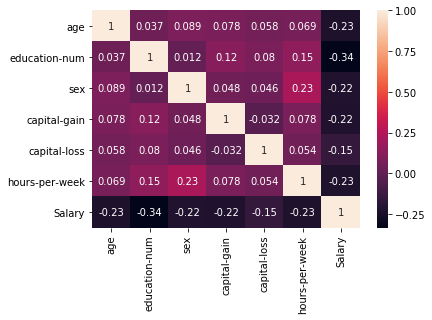

In [11]:
sns.heatmap(df.corr(), annot = True)

In [12]:
df.shape
df['native-country'] = df['native-country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)
df.shape

(30162, 13)

In [13]:
for ds in [df]:
    ds.loc[ds['native-country'] != ' United-States', 'native-country'] = 'Non-US'
    ds.loc[ds['native-country'] == ' United-States', 'native-country'] = 'US'

In [14]:
#Converting country into integer

df['native-country'] = df['native-country'].map({'US':1,'Non-US':0}).astype(int)

In [15]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1


In [16]:
df.dtypes

age                int64
workclass         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
Salary             int32
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['race'])
df['race']=le.transform(df['race'])
le.fit(df['workclass'])
df['workclass']=le.transform(df['workclass'])
le.fit(df['marital-status'])
df['marital-status']=le.transform(df['marital-status'])
le.fit(df['occupation'])
df['occupation']=le.transform(df['occupation'])
le.fit(df['relationship'])
df['relationship']=le.transform(df['relationship'])

In [18]:
df.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,1,1
1,50,4,13,2,3,0,4,1,0,0,13,1,1
2,38,2,9,0,5,1,4,1,0,0,40,1,1
3,53,2,7,2,5,0,2,1,0,0,40,1,1
4,28,2,13,2,9,5,2,0,0,0,40,0,1
5,37,2,14,2,3,5,4,0,0,0,40,1,1
6,49,2,5,3,7,1,2,0,0,0,16,0,1
7,52,4,9,2,3,0,4,1,0,0,45,1,-1
8,31,2,14,4,9,1,4,0,14084,0,50,1,-1
9,42,2,13,2,3,0,4,1,5178,0,40,1,-1


In [19]:
#sns.set(style="ticks")
#sns.pairplot(df, hue="Salary")
#plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

scaler = StandardScaler()
t=df['Salary']
df_p=df.drop(['Salary'],axis=1)
X_trn,X_tst,y_trn,y_tst = model_selection.train_test_split(df_p,t,test_size=0.30,random_state=40)

## Plots for understanding or Analysis

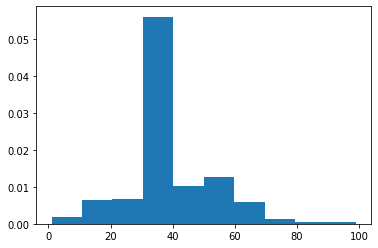

In [21]:
x= df['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

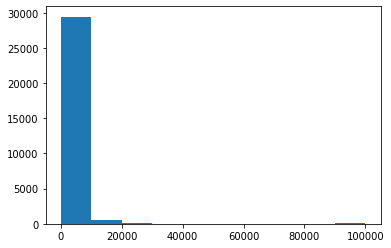

In [22]:
x=df['capital-gain']
plt.hist(x,bins=None,normed=None)
plt.show()

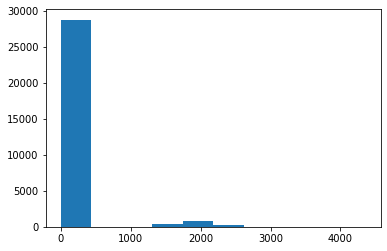

In [23]:
x=df['capital-loss']
plt.hist(x,bins=None)
plt.show()

## Preliminary observation

1. The education and education-num columns are kind of equivalent. education-num is the numerical equivalent of education. Some of the variables have missing values such as native-country. I have preprocessed it by removing all the null values in that column.
2. It has been noticed that income varies greatly across different occupations. Nearly half of Professional occupation makes greater than $50,000 a year, while that percentage is only 13% for Service occupation.
3. capital_gain and capital_loss are two continuous variables describing income and loss from financial investments. Histograms show that the distributions of these two variables are both highly screwed.

## Summary of Classification Models



### Pocket Algorithm

The pocket algorithm is a perceptron learning algorithm with a memory which keeps the result of the iteration. This algorithm keeps the best result seen so far in its pocket (that is why it is called Pocket Learning Algorithm).
The best result means the number of misclassification is minimum. If the new weights produce a smaller number of misclassification than the weights in the pocket, then replace the weights in the pocket to the new weights; if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, rather than the last solution.

### QDA

In QDA, you assume that the covariance matrix can be different for each class and so, we will estimate the covariance matrix 
Σk separately for each class k, k =1, 2, ... , K.
In this approach, a decision boundary is defined by calculating the posterior and prior probabilities. The data is assumed to follow Gaussian Distribution. For this approach, the means, covariances and prior probabilities. The probability that one instance belongs to a class is calculated by considering the mean, covariance and prior probability for the target.

### LDA

Maintaining the covariance matrix is not cheap. Considering the input dimension d, the symmetric covariance meetric contains d(d+1)2.

Also, the data is undersampled, the resulting class boundary has high chance of overfitting.

Simply using the same covariance for all the classes, we can reach the linear discriminant analysis model, which can overcome the stated problems above.

LDA makes predictions by calculating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class.


$$
 \delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
 $$

In many cases, for simple computation, the covariance matrix Σ is chosen as an average of all the covariance matrices for all classes,

$$
 \boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
 $$

### Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.


### A. Super Classs Definition

In [24]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass

### Explanation of Code

BaseModel class consists of two abstract methods train() and use(). Any class that extends this BaseModel class has to provide implementation for these abstract methods. Classifier extends BaseModel class with functions again abstract. Classifier class provides three concrete methods normalize(), check_matrix(), add_ones(). check_matrix() checks if passed argument is 2D matrix or not, if it is not, then it raises the value error. add_ones() checks whether the matrix is 2D or not and if it is, it adds a column of 1s at the beginning of the matrix. normalize function standardize the input by calculating mean and standard deviation.

### B. Pocket Algorithm

In [25]:
from copy import deepcopy as copy 
import pandas as pd
class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.maxiter=1
        self.alpha=0.01
        self.w=None
        self.w_pocket=None
        
    @staticmethod   
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        N=X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w_pocket=copy(self.w)
        print(self.w_pocket)
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.w_pocket)
        
    def use(self, X):
        return np.sign(X @ self.w_pocket)

### Explanation of Code

Pocket algorithm is the child class of Super class Classifier. It consistes of two function train and use.
Train function will train the data. Use function is used to test the data. Maxiter means maximum number of iteration. So it means maximum number of times training of data will occur. Use function will use the test data to predict the value. Initial weight w is set to zero then the weight is copied to w_pocket which is nothing but the pocket that stores the best weight seen so far. It will replace the value if weights with better value is seen and replace and keep it in the w_pocket. Compare function is used to compare weights.

### C. QDA

In [26]:
from copy import deepcopy as copy
class QDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
       
        
        
    @staticmethod    
    def QDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        sub = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(sub @ sigma_inv * sub, axis=1) + np.log(p)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['Salary']=t
        X1=new_df[new_df['Salary'] == -1]
        X1=X1.drop(['Salary'],axis=1)
        X2=new_df[new_df['Salary'] == 1]
        X2=X2.drop(['Salary'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.QDAfunc(Xtest,np.matrix(self.mu1),self.Sigma1,self.p1),self.QDAfunc(Xtest,np.matrix(self.mu2),self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

### Explanation of Code

QDA algorithm is child class of Super class Classifier. It will implement the abstract methods.
QDAfunc will be calculating the discriminant value for each class. Train function takes X,T as input where X is train data and T is target variables of train data. mu1 and mu2 are mean. N1 and N2 are used to store the status rows in it.
So that we can calculate probability based upon number of rows of a particular class. For example, we have two class 1 and -1. 
Now we calculate probability by N1/N1+N2 where N1= number of rows of class=1 and N1+N2= total number of rows for both class. Similarly, we will calculate probability for both the classes. We store these probabilities in variables p1 and p2.
Sigma1 and Sigma2 stores the covariance for X1(class=1) and X2(class=2).
use function will evaluate d1 and d2 by calling QDAfunc and then checking the greater value and assigning the class -1 and 1 accordingly and returns prediction and d1,d2.

### D. LDA

In [27]:
class LDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
        
        
    @staticmethod    
    def LDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(p), axis=1)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['Salary']=t
        X1=new_df[new_df['Salary'] == -1]
        X1=X1.drop(['Salary'],axis=1)
        X2=new_df[new_df['Salary'] == 1]
        X2=X2.drop(['Salary'],axis=1)
        
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
              
        self.Sigma = np.cov(tt.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
        print(self.p1)
        print(self.p2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.LDAfunc(Xtest,self.mu1,self.Sigma,self.p1),self.LDAfunc(Xtest,self.mu2,self.Sigma,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],-1,1)
        return pred,self.d1,self.d2

### Explanation of Code

LDA algorithm is child class of Super class Classifier.
LDAfunc function will be calculating the discriminant value.
train function takes X,T as input where X is train data and T is target variables of train data.
So that we can calculate probability based upon number of rows of a particular class. For example, we have two class 1 and -1. We store all rows of class=1 in N1 and all rows of class=-1 in N2.
Now we calculate probability by N1/N1+N2 where N1= number of rows of class=1 and N1+N2= total number of rows for both class. Similarly, we will be calculating probability for both the classes.
We store these probabilities in variables p1 and p2.
use function will be evaluating d1 and d2 by calling LDAfunc and then checking the greater value and assigning the class -1 and 1 accordingly and returns prediction and d1,d2.

### E. Logistic Regression

In [28]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)

       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

### Explanation of Code

Logistic regression algorithm is child class of Super class Classifier.
Hence it will implement the abstract methods. It has train and use function.
Train function will takes input matrices X and T.
It calculates values of D and K. D=number of features, K = number of unique classes in T.
use() function takes test data X as input.
It normalizes it and add ones column to X.
It calculates output variable using sigmoid function on dot product of Xs and weights matrix.
Sigmoidfunc generalizes sigmoid function.

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Pocket Algorithm

In [29]:
#from sklearn.preprocessing import StandardScaler
#from sklearn import model_selection

#scaler = StandardScaler()


#t=df['Salary']
#df_p=df.drop(['Salary'],axis=1)
#X_trn,X_tst,y_trn,y_tst = model_selection.train_test_split(df_p,t,test_size=0.30,random_state=40)

In [29]:
X_trn=scaler.fit_transform(X_trn)
X_tst=scaler.fit_transform(X_tst)
y_trn=np.array(y_trn)
y_tst=np.array(y_tst)

In [30]:
p=Pocket()
p.train(X_trn,y_trn)

# Prediction on train set
yprd_trn=p.use(X_trn)

# Prediction on test set
yprd_p=p.use(X_tst)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  0
[-0.00237742  0.01504536 -0.02712588 -0.00378814  0.00439126  0.01476689
 -0.00790734 -0.02221496 -0.24541379 -0.07820492 -0.01209816 -0.0054597 ]


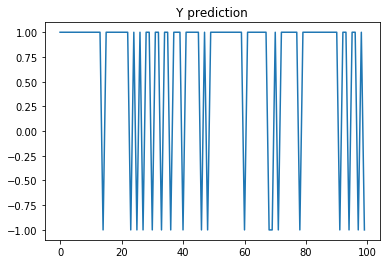

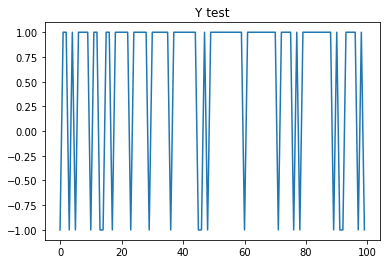

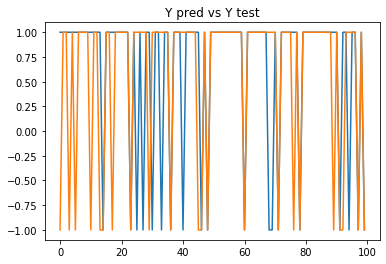

In [31]:
plt.title("Y prediction")
plt.plot(yprd_p[0:100])
plt.show()
plt.title("Y test")
plt.plot(y_tst[0:100])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(yprd_p[0:100])
plt.plot(y_tst[0:100])
plt.show()

### Accuracy, F1 of trained data

In [32]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_trn,yprd_trn))
print('F1 score:', f1_score(y_trn,yprd_trn))

Accuracy: 0.7970918391512338
F1 score: 0.8659658344283837


### Confusion matrix of test data

In [33]:
cf=confusion_matrix(y_tst, yprd_p)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

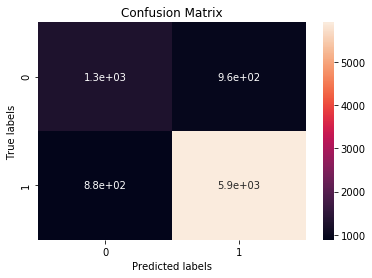

In [34]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## Evaluation matrix

### Precision

In [35]:
precision=(TP/(TP+FP))
precision

0.8601134215500945

### Specificity

In [36]:
specificity=TN/(TN+FP)
specificity

0.5724444444444444

### Recall

In [37]:
recall=TP/(TP+FN)
recall

0.869980879541109

### Accuracy, F1 of test data 

In [38]:
print('Accuracy:', accuracy_score(y_tst,yprd_p))
print('F1 score:', f1_score(y_tst,yprd_p))

Accuracy: 0.7959995579622058
F1 score: 0.8650190114068441


### ROC AUC Score

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_tst, yprd_p)

0.7212126619927767

## 2. QDA

In [41]:
# Dividing data into train set and test set
from sklearn import model_selection
from sklearn.metrics import r2_score
t=df.iloc[:,-1]
df_data=df.drop(['Salary'],axis=1)
X_trn,X_tst,y_trn,y_tst = model_selection.train_test_split(df_data,t,test_size=0.20,random_state=40)

In [42]:
# Training
q=QDA1()
q.train(X_trn,y_trn)

### Accuracy, F1 Train Data

In [43]:
ypred_qda_train,d1,d2=q.use(X_trn)

In [44]:
print('Accuracy:', accuracy_score(y_trn,ypred_qda_train))
print('F1 score:', f1_score(y_trn,ypred_qda_train))

Accuracy: 0.7953085498777405
F1 score: 0.8750284658788997


### Test data prediction

In [45]:
ypred_qda_test,d1,d2=q.use(X_tst)
print(d1)
print(d2)

[ -1.41988333  -7.3645264   -3.20916801 ... -12.91001828  -1.6256568
  -7.46022836]
[ 0.28077054 -1.30240953  0.71512141 ... -0.68019533  0.71299864
 -3.04278427]


### Confusion matrix test data

In [46]:
cf1=confusion_matrix(y_tst, ypred_qda_test)
cf1

array([[ 463, 1020],
       [ 217, 4333]], dtype=int64)

In [47]:
TP=cf1[1][1]
TN=cf1[0][0]
FN=cf1[1][0]
FP=cf1[0][1]

### Precision

In [48]:
precision=(TP/(TP+FP))
precision

0.8094526433775453

### Specificity

In [49]:
specificity=TN/(TN+FP)
specificity

0.3122049898853675

### Recall

In [50]:
recall=TP/(TP+FN)
recall

0.9523076923076923

### Accuracy, F1

In [51]:
print('Accuracy:', accuracy_score(np.array(y_tst), ypred_qda_test))
print('F1 score:', f1_score(np.array(y_tst), ypred_qda_test))

Accuracy: 0.7949610475716891
F1 score: 0.8750883570635161


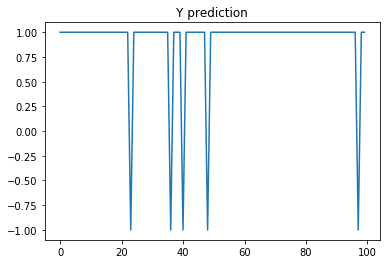

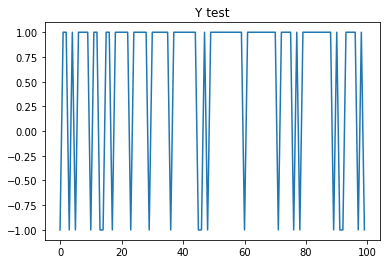

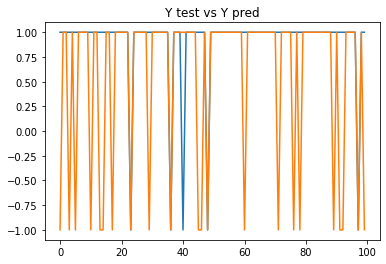

In [52]:
plt.title("Y prediction")
plt.plot(ypred_qda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_tst[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_qda_test[0:100])
plt.plot(np.array(y_tst[0:100]))
plt.show()

### ROC AUC score

In [53]:
roc_auc_score(y_tst, ypred_qda_test)

0.6322563410965298

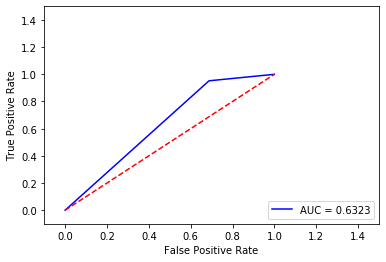

In [54]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tst, ypred_qda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

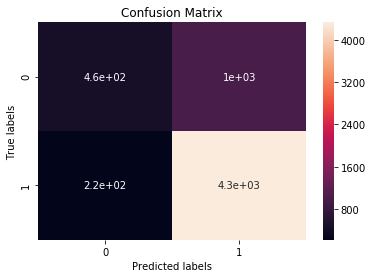

In [55]:
ax= plt.subplot()
sns.heatmap(cf1, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

Text(0.5, 0.92, 'QDA Discriminant Functions')

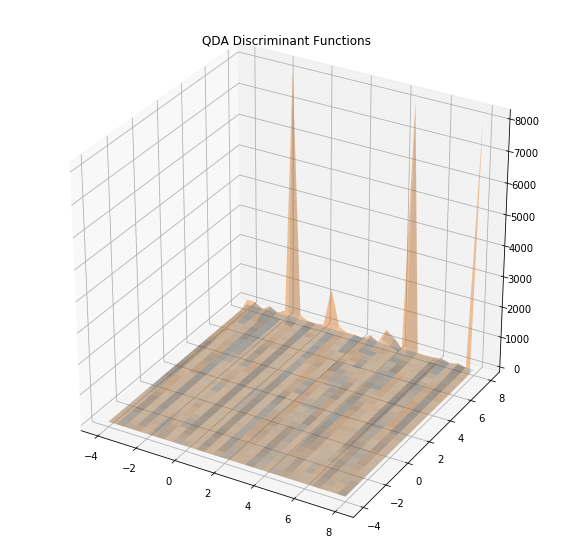

In [56]:
from mpl_toolkits.mplot3d import Axes3D
p,d1_p,d2_p = q.use(X_tst[:900])    #predicted


xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

Text(0.5, 0.92, 'QDA Discriminant Functions')

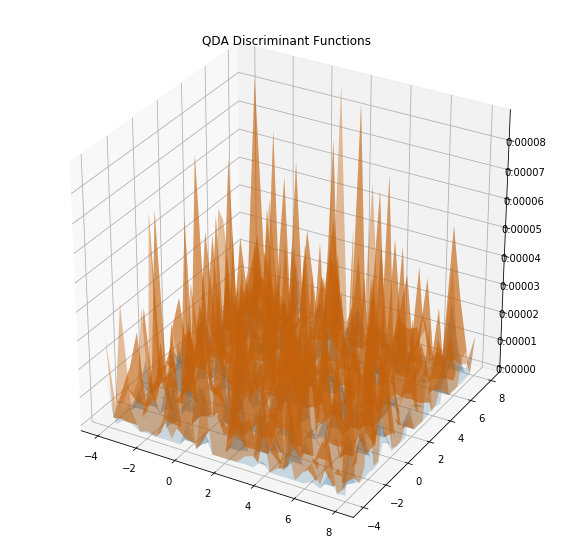

In [57]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_trn.shape[1]*np.log(2*np.pi) - np.log(q.p1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_trn.shape[1]*np.log(2*np.pi) - np.log(q.p2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

plt.title("QDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

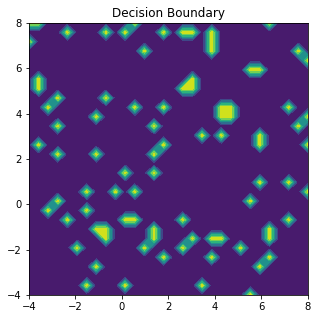

In [58]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## 3. LDA

In [59]:
from sklearn import model_selection
from sklearn.metrics import r2_score
t=df.iloc[:,-1]
df_data=df.drop(['Salary'],axis=1)
X_trn,X_tst,y_trn,y_tst = model_selection.train_test_split(df_data,t,test_size=0.20,random_state=40)

In [60]:
l=LDA1()
l.train(X_trn,y_trn)

0.24969953168386588
0.7503004683161341


In [61]:
ypred_lda_test,d1,d2=l.use(X_tst)

### Accuracy,F1 score on train data

In [62]:
print('Accuracy:', accuracy_score(y_tst,ypred_lda_test))
print('F1 score:', f1_score(y_tst,ypred_lda_test))

Accuracy: 0.7541853141057517
F1 score: 0.8598696021921951


### Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix
cf2=confusion_matrix(y_tst, ypred_lda_test)
cf2

array([[   0, 1483],
       [   0, 4550]], dtype=int64)

In [64]:
TP=cf2[1][1]
TN=cf2[0][0]
FN=cf2[1][0]
FP=cf2[0][1]

### Precision, Specificity and Recall

In [65]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.7541853141057517
Specificity:  0.0
Recall:  1.0


### Accuracy and F1 score

In [66]:
print('Accuracy:', accuracy_score(y_tst, ypred_lda_test))
print('F1 score:', f1_score(y_tst, ypred_lda_test))

Accuracy: 0.7541853141057517
F1 score: 0.8598696021921951


### ROC AUC Score

In [67]:
roc_auc_score(y_tst, ypred_lda_test)

0.5

In [68]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tst, ypred_lda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

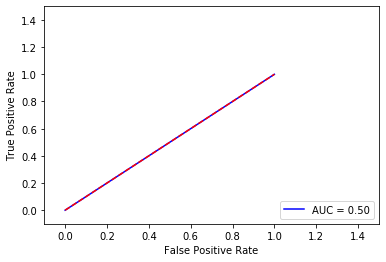

In [69]:
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

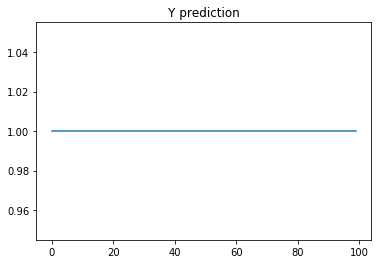

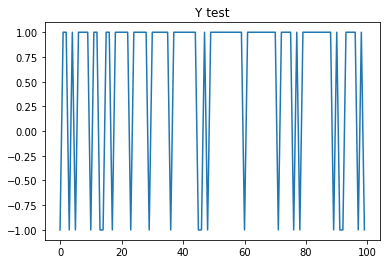

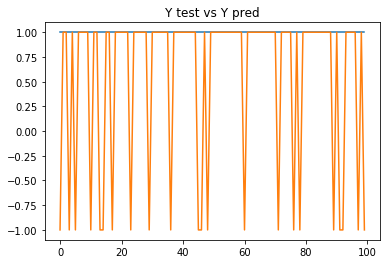

In [70]:
plt.title("Y prediction")
plt.plot(ypred_lda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_tst[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_lda_test[0:100])
plt.plot(np.array(y_tst[0:100]))
plt.show()

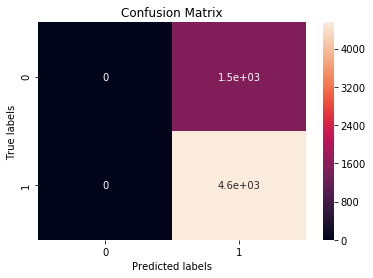

In [71]:
ax= plt.subplot()
sns.heatmap(cf2, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [72]:
p,d1_p,d2_p = l.use(X_tst[:900]) #predicted

Text(0.5, 0.92, 'LDA Discriminant Functions')

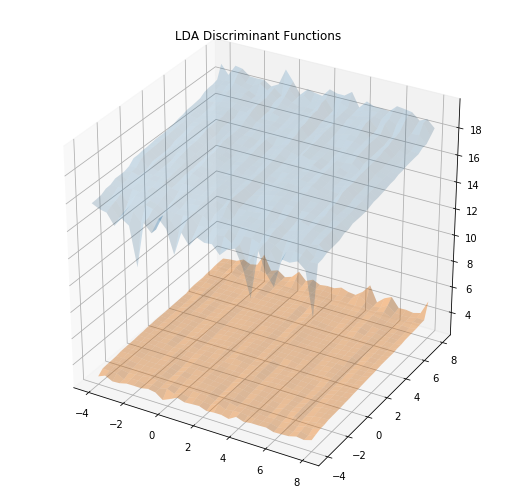

In [73]:
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 0.92, 'LDA Discriminant Functions')

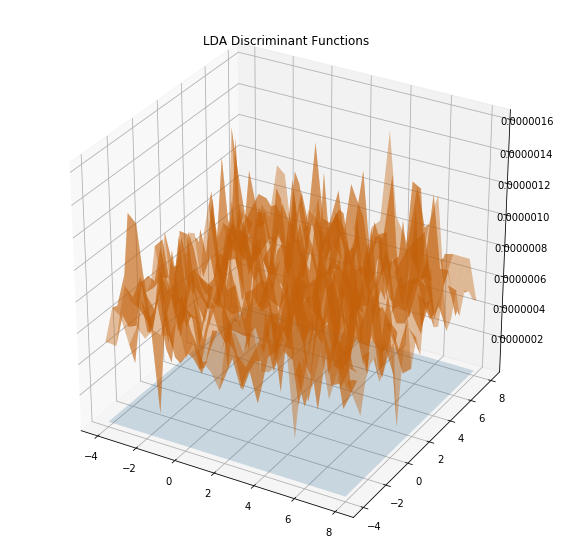

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_trn.shape[1]*np.log(2*np.pi) - np.log(l.p1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_trn.shape[1]*np.log(2*np.pi) - np.log(l.p2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

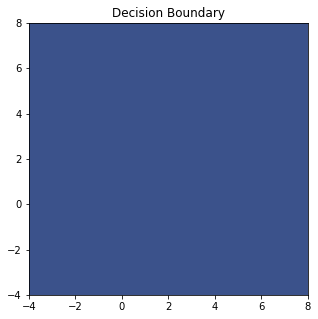

In [75]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

## Logistic Regression

In [76]:
logr = Logistic(0.0001)
XTrn, XTst, YTrn, YTst = model_selection.train_test_split(df, t,test_size=0.20,random_state=42)

In [77]:
logr.train(XTrn[:],np.array(YTrn[:]))
ypred_lr_train = logr.use(XTrn[:])
ypred_lr_train = np.argmax(ypred_lr_train, 1)
print(ypred_lr_train)
y_trn=np.array(YTrn)
y_trn=np.where(YTrn==-1,0,1)
print(y_trn)

[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]


### Accuracy, F1 on train data

In [78]:
print('Accuracy:', accuracy_score(y_trn, ypred_lr_train))
print('F1 score:', f1_score(y_trn, ypred_lr_train))

Accuracy: 0.9999585560943264
F1 score: 0.9999724525495166


In [79]:
ypred_lr_test = logr.use(XTst[:])
ypred_lr_test

array([[0.98612245, 0.01387755],
       [0.01471626, 0.98528374],
       [0.979704  , 0.020296  ],
       ...,
       [0.98677362, 0.01322638],
       [0.01765868, 0.98234132],
       [0.00891847, 0.99108153]])

In [80]:
ypred_lr_test = np.argmax(ypred_lr_test, 1)
print(ypred_lr_test)
y_tst=np.array(YTst)
y_tst=np.where(YTst==-1,0,1)
print(y_tst)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]


### Confusion matrix

In [81]:
cf3=confusion_matrix(y_tst, ypred_lr_test)
cf3

array([[1530,    0],
       [   0, 4503]], dtype=int64)

In [82]:
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

### Precision, Specificity and Recall

In [83]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  1.0
Specificity:  1.0
Recall:  1.0


### Accuracy, F1 on test data

In [84]:
print('Accuracy:', accuracy_score(y_tst, ypred_lr_test))
print('F1 score:', f1_score(y_tst, ypred_lr_test))

Accuracy: 1.0
F1 score: 1.0


### ROC AUC Score

In [85]:
roc_auc_score(y_tst, ypred_lr_test)

1.0

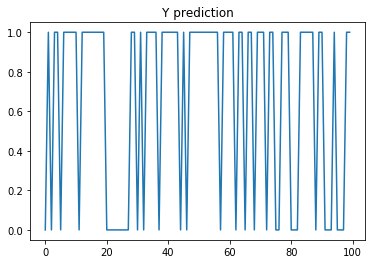

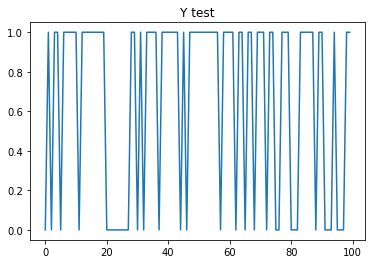

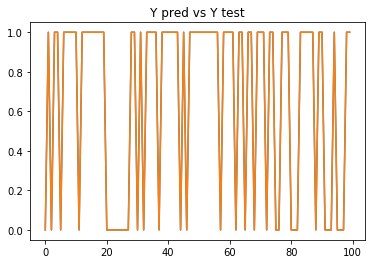

In [86]:
plt.title("Y prediction")
plt.plot(ypred_lr_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_tst[0:100]))
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_lr_test[0:100])
plt.plot(np.array(y_tst[0:100]))
plt.show()

Text(0.5, 1, 'Confusion Matrix')

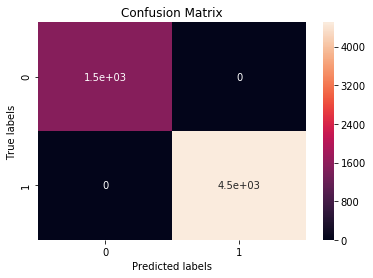

In [87]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

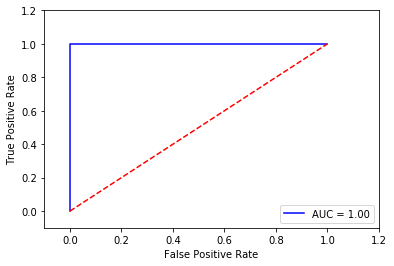

In [88]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tst, ypred_lr_test)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Discussion about evaluation metrics

Confusion matrix also known as error matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

There are several classification measurements to meet different needs for practical applications. We are going to examine various measures for the same.

Precision : Precision can be seen as the proportion of positive identifications that was actually correct.

Precision=TP/(TP+FP)


Recall (Sensitivity or True Positive Rate): This measure can be seen as the proportion of actual positives that was identified correctly. 

Recall=TP/(TP+FN)



Specificity (True Negative Rate) : Considering imblance or difference in class, we consider TNR as well.

specificity=TN/(TN+FP)


F1 Score
For convenience, this measure provides the harmonic mean of precision and recall. This can be used when we need a single measure instead of multiple as above.

ROC Curve
The ROC curve is another popular tool for binary classifications. An ROC curve is a graph showing the performance of a classification model at all classification thresholds.It plots the true positive rate (recall) vs the false positive rate (1 - specificity). When the classification results are good, the curve gets close to retangular curve, close to 1 on the 0 FPR.

# Discussion about Train and Test accuracies

### Pocket Algorithm

I got the following results for the training data:<br> <br> 


Accuracy: 0.7970918391512338<br> 
F1 score: 0.8659658344283837<br> <br> 


I got the following results for the test data:<br> <br> 


Precision: 0.8601134215500945<br> 
Specificity: 0.5724444444444444<br> 
Recall: 0.869980879541109<br> <br> 

ROC AUC Score: 0.7212126619927767<br> <br> 

Pocket algorithm gave precision for training as 79% and while testing it gave 86% which is greater and pocket algorithm was able to classify more correcly when testing of data compared to training. This implies that the algorithm was able to learn more with training and testing.
Our model is working well both on training data and test data which is clear from the above results. Its working similarily on both the data without any overfitting. Model doesn't underfit as it is achieving good results.

### QDA

I got the following results for the training data:<br> <br> 


Accuracy: 0.7953085498777405<br> 
F1 score: 0.8750284658788997<br> <br> 


I got the following results for the test data:<br> <br> 


Precision: 0.8094526433775453<br> 
Specificity: 0.3122049898853675<br> 
Recall: 0.9523076923076923<br> <br> 

ROC AUC Score: 0.6322563410965298<br> <br> 

Unlike Pocket Algorithm the difference between precision of training data and test data is not much. This means that the algorithm could not learn much with the training. 

### LDA

I got the following results for the training data:<br> <br> 


Accuracy: 0.7513537407448336<br> 
F1 score: 0.8580262493690055<br> <br> 


I got the following results for the test data:<br> <br> 


Precision:  0.7513537407448336<br> 
Specificity:  0.0<br> 
Recall:  1.0<br> <br> 

ROC AUC Score: 0.5<br> <br> 

Recall/Sensitivity is the measure of the probability that your estimate is 1 given all the samples whose true class label is 1. As we can see above, this model was able to accurately predict the positive class.

### Logistic Regression

I got the following results for the training data:<br> <br>


Accuracy: 0.9999585560943264<br> 
F1 score: 0.9999724525495166<br> <br> 


I got the following results for the test data:<br> <br> 


Precision:  1.0<br> 
Specificity:  1.0<br> 
Recall:  1.0<br> <br> 

ROC AUC Score: 1.0<br> <br> 

Logistic regression has performed better than LDA with more accuracy than LDA. 

# Discussions about Classification model comparision

What we can clearly see from the results is that Logistic regression is achieving better results compared to other models with Pocket algorithm performing second best considering AUC score, F1 score. AUC score, F1 are used for evaluation. The third best would be QDA considering AUC score, F1 score. And the last would be LDA. Looks like LDA model was not able to accurately predict the positive class. Recall/Sensitivity is the measure of the probability that your estimate is 1 given all the samples whose true class label is 1.

Pocket <br>
Precision: 0.8601134215500945<br>
Specificity: 0.5724444444444444<br>
Recall: 0.869980879541109<br><br>

QDA<br>
Precision: 0.8094526433775453<br>
Specificity: 0.3122049898853675<br>
Recall: 0.9523076923076923<br><br>

LDA<br>
Precision: 0.7513537407448336<br>
Specificity: 0.0<br>
Recall: 1.0<br><br>

Logistic Regession<br>
Precision: 1.0<br>
Specificity: 1.0<br>
Recall: 1.0

# Conclusions

I think Perceptron algorithm has worked very well on comparision with other models. It has achieved very good evaluation scores considering AUC score, F1 score. In this assignment, I understood the working of the training models by coding and training and testing the data on it. It helped me gain a better understanding of the Classifiers. 

# References

Professor's Notebooks - https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/slides/Classification.ipynb

https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.ipynb

https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/slides/Linear%20Classification.ipynb


# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)